# Load libraries

In [93]:
import os
import sys
sys.path.append('../')

import pandas as pd
from nlp.tokenizer import SocialMediaTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib.pyplot as plt

# Data

In [2]:
!ls ../data/

2004089023028482  343186926369517  608327433007967
336351773711943   402838873893694


In [3]:
!ls ../data/2004089023028482

2004089023028482.csv  2004089023028482.json


In [5]:
!head ../data/2004089023028482/2004089023028482.csv

"created_time","message","id"
"2019-06-16T10:39:35+0000","Allez vite suivre ses aventures sur https://www.instagram.com/thatpugpablo/ :)","10157555610539284_10157555611994284"
"2019-06-16T13:39:46+0000","Je les trouve sages moi 🙂 Je dors avec un homme et il bouge bien plus qu'eux deux réunis 😂","10157555610539284_10157555968434284"
"2019-06-16T14:57:51+0000","On voit ceux qui lâchent leurs chiens au bord de la route pour aller en vacances, c ceux qui gueule qu'un chien c forcément salle et qui on rien a faire dans un lit.","10157555610539284_10157556153194284"
"2019-06-16T14:33:16+0000","Dormir avec des chiens c'est a vomir fait vraiment être un crasseux pour cela","10157555610539284_10157556093954284"
"2019-06-16T12:52:57+0000","Je ne suis pas expert en chien mais je suis sûr qu'il s'agit d'un mal et une femelle. Je vous laisse deviner lequel est la femelle 😀","10157555610539284_10157555868324284"
"2019-06-16T12:22:18+0000","Je dort avec 2 boxers de 40 kg, avec un lit xxl ça passe 😂",

In [8]:
def read_csv_file(id, data_path):
    data = pd.read_csv(os.path.join(data_path, str(id), str(id) + '.csv'))
    return data

In [99]:
data = read_csv_file(2004089023028482, '../data/')

In [100]:
data.sample(10)

,created_time,message,id
188,2019-06-16T16:00:05+0000,Maude Gagnon😍 je veut un pug hahaha mokkkaaaaaa,10157555610539284_10157556303194284
45,2019-06-16T16:00:27+0000,Qui a dit qu'un chien ou qu'un chat c'est forc...,10157555610539284_10157556305094284
284,2019-06-16T11:08:24+0000,Mélany Nadon Boubou 🤣,10157555610539284_10157555663809284
495,2019-06-16T17:43:02+0000,Cindy Pilon,10157555610539284_10157556624674284
47,2019-06-16T13:10:09+0000,Sab Rina regarde se que font ses chiant la nui...,10157555610539284_10157555902959284
552,2019-06-16T12:29:27+0000,MJ Allard,10157555610539284_10157555818689284
74,2019-06-16T16:47:27+0000,Oh chacun fait bien comme il veut Les donneurs...,10157555610539284_10157556440679284
689,2019-06-16T11:47:28+0000,C sale ptin il se bouffe le cul toute la journée,10157555610539284_10157555745209284
143,2019-06-17T09:19:24+0000,Moi je dors bien,10157555610539284_136256637568257
93,2019-06-16T17:38:25+0000,Anthony notre quotidien 😂❤️,10157555610539284_10157556608839284


In [101]:
print("Comment example : {}".format(data['message'].sample().iloc[0]))

Comment example : Marianne ALBERT !!


# Process comments

In [102]:
def process_text(text):
    tk = SocialMediaTokenizer(text)
    tk.tokenize()
    tk.process_text()
    tk.clean_text_
    return tk.clean_text_

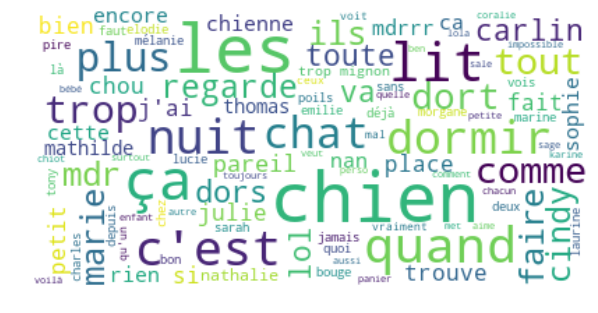

In [109]:
stopWords = set(stopwords.words('french'))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopWords).generate(" ".join(data['clean_text'].values))
plt.figure(figsize=(10, 7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()